In [2]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

In [8]:
data=pd.read_csv("D:\\Electives\\analytics\\Basic Introduction to Python\\ipl.csv") #reading csv file

In [9]:
data.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [12]:
data.info()  #gathering all information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [10]:
data.isnull().sum() #checking the null value

Sl.NO.           0
PLAYER NAME      0
AGE              0
COUNTRY          0
TEAM             0
PLAYING ROLE     0
T-RUNS           0
T-WKTS           0
ODI-RUNS-S       0
ODI-SR-B         0
ODI-WKTS         0
ODI-SR-BL        0
CAPTAINCY EXP    0
RUNS-S           0
HS               0
AVE              0
SR-B             0
SIXERS           0
RUNS-C           0
WKTS             0
AVE-BL           0
ECON             0
SR-BL            0
AUCTION YEAR     0
BASE PRICE       0
SOLD PRICE       0
dtype: int64

In [11]:
data.shape  #checking the shape

(130, 26)

In [108]:
x=data.iloc[: , [6,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22]]  #features
y=data.iloc[:,5]                                                #labels

In [110]:
np.unique(y)

array(['Allrounder', 'Batsman', 'Bowler', 'W. Keeper'], dtype=object)

In [111]:
from sklearn.model_selection import train_test_split                              #splitting our data into train,test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0) #giving x-features y-labels

In [112]:
from sklearn.preprocessing import StandardScaler 
sc= StandardScaler() 


In [113]:
x_train=sc.fit_transform(x_train) #fitting train data and test data  in standard scaler
x_test=sc.fit_transform(x_test)

In [125]:
from sklearn.model_selection import GridSearchCV
parameters={
          'criterion':['gini','entropy'],        #criterion of the model
          'random_state':[0,10,15,16,17,19,20], 
          'max_depth':[1,3,4,5,8,9,11,14,15]    #max depth of the model
           
           
           }

In [123]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [126]:
grid_search=GridSearchCV(estimator=dtc , param_grid=parameters , cv=10)

In [127]:
grid_search.fit(x_train,y_train) #fitting model data for training

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [128]:
grid_search.best_estimator_ #finding the best estimators from the given parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=19, splitter='best')

In [132]:
y_pred= grid_search.predict(x_test) #predicting by test data
x_pred= grid_search.predict(x_train) #predicting by train data


In [134]:
from sklearn.metrics import accuracy_score
print("test accuracy score:",accuracy_score(y_test,y_pred))     #best accuracy for the test 
print("train accuracy score:",accuracy_score(y_train,x_pred))   #best accuracy for the train

test accuracy score: 0.5769230769230769
train accuracy score: 0.8557692307692307


In [135]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_pred,y_test)

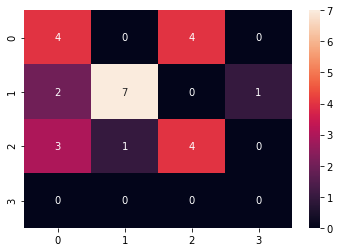

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
x=sns.heatmap(c, annot=True , fmt="d")
plt.show()